In [5]:

%matplotlib notebook

In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import gmaps
import requests
import json
from pprint import pprint
from config import (api_key, gkey)
c = Census(api_key, year=2016)
from datetime import datetime
import gmaps
from us import states
import time

In [3]:
file_to_load = pd.read_csv("bayarea_zipcodes.csv", dtype="object", encoding="utf-8")
zip_code_df = pd.DataFrame(file_to_load)
zip_code_df.head()
bay_area_zip = []
for index, row in zip_code_df.iterrows():
    bay_area_zip.append(row['ZIP'])
zip_code_df.head()

,PO_NAME,the_geom,ZIP,STATE,Area__,Length__
0,NAPA,MULTIPOLYGON (((-122.10329200180091 38.5132829...,94558,CA,12313263537,995176.225313
1,FAIRFIELD,MULTIPOLYGON (((-121.947475002335 38.301511000...,94533,CA,991786103.42,200772.556587
2,DIXON,MULTIPOLYGON (((-121.65335500334429 38.3133870...,95620,CA,7236949520.92,441860.2014
3,SONOMA,MULTIPOLYGON (((-122.406843003057 38.155681999...,95476,CA,3001414164.85,311318.546326
4,NAPA,MULTIPOLYGON (((-122.29368500225117 38.1552379...,94559,CA,1194301744.88,359104.646602


In [4]:
time_list = []
time_am= [int(datetime(2018,10,8,8).timestamp()),int(datetime(2018,10,8,10).timestamp()) ]
time_pm = [int(datetime(2018,10,8,17).timestamp()),int(datetime(2018,10,8,19).timestamp())]

time_list = [int(datetime(2018,10,8,8).timestamp()),int(datetime(2018,10,8,10).timestamp()) ,int(datetime(2018,10,8,17).timestamp()),int(datetime(2018,10,8,19).timestamp())]
print(time_list)
real_time = [("2018-10-08 08:00:00"),("2018-10-08 10:00:00"),("2018-10-08 17:00:00"),("2018-10-08 19:00:00")]

print(real_time)
#datetime.datetime(time_list[0]).timestamp()

[1539010800, 1539018000, 1539043200, 1539050400]
['2018-10-08 08:00:00', '2018-10-08 10:00:00', '2018-10-08 17:00:00', '2018-10-08 19:00:00']


In [5]:
#testing variable so im not running long code
#start_loc = ["Alameda,CA","Solano","Sonoma","Napa County"]
start_loc = ["Alameda,CA","Contra Costa,CA","Marin County","Napa County","San Francisco","San Mateo","Santa Clara","Solano","Sonoma"]
end_loc = (list(reversed(start_loc)))
#end_loc = (list(reversed(bay_area_zip)))
#time_list = [1539009000]
origin_Loc = []
destination_loc = []
trip_distance = []
trip_duration = []
traffic_duration = []
origin_lat = []
origin_long = []
dest_lat= []
dest_long= []
trip_time = []              
#target_url = (f'https://maps.googleapis.com/maps/api/distancematrix/json?origins=San Francisco,CA|Oakland,CA&destinations=San Jose,CA|Palo Alto,CA&departure_time=now&key={gkey}')

In [6]:
for times,x in zip(time_list,real_time):
    
   # for s_loc in bay_area_zip:
    for s_loc in start_loc :
        for e_loc in end_loc:
            try:
                target_url = (f'https://maps.googleapis.com/maps/api/distancematrix/json?origins={s_loc}&destinations={e_loc}&mode=driving,CA&departure_time={times}&traffic_model=pessimistic&key={gkey}')
                
                geo_data = requests.get(target_url).json()
                
                destination_loc.append(geo_data['destination_addresses'][0])
                origin_Loc.append(geo_data['origin_addresses'][0])
                trip_distance.append(geo_data['rows'][0]['elements'][0]['distance']['value'])
                traffic_duration.append(geo_data['rows'][0]['elements'][0]['duration_in_traffic']['value'])
                trip_duration.append(geo_data['rows'][0]['elements'][0]['duration']['value'])
                
                #two calls with the start and end point geo location
                target_url_origin = (f' https://maps.googleapis.com/maps/api/geocode/json?address={s_loc}&key={gkey}')
                target_url_exit = (f' https://maps.googleapis.com/maps/api/geocode/json?address={e_loc}&key={gkey}')
                geoloc_data_origin = requests.get(target_url_origin).json()
                geoloc_data_exit = requests.get(target_url_exit).json()
                origin_lat.append(geoloc_data_origin['results'][0]['geometry']['location']['lat'])
                origin_long.append(geoloc_data_origin['results'][0]['geometry']['location']['lng'])
                dest_lat.append(geoloc_data_exit['results'][0]['geometry']['location']['lat'])
                dest_long.append(geoloc_data_exit['results'][0]['geometry']['location']['lng'])
                trip_time.append(x)
               
                #pprint(geo_data)
                
            except(KeyError):
                print(f"something broke with either {s_loc} or {e_loc}")

In [7]:
#converting units into minutes/miles
#minute_traffic = (traffic_duration-trip_duration)/60
traffic_duration = [x/60 for x in traffic_duration]
trip_duration  = [x/60 for x in trip_duration]
minute_traffic = [x-y for  x,y in zip(traffic_duration,trip_duration)]
#miles_distance = trip_distance/1,609.344
miles_distance = [z* 0.00062137 for z in trip_distance]

print( len(trip_time))


324


In [32]:
traffic_dic = {"Origin":origin_Loc,
               "Destination":destination_loc,
               "Time of day": trip_time,
               "Distance(Miles)":miles_distance,
               "Trip length(minutes)":trip_duration,
               "Trip in traffic(minutes)":traffic_duration,
               "Traffic(minutes)":minute_traffic,"Origin Lat" :origin_lat, "Origin Lng" :origin_long,
               "Destination Lat":dest_lat,"Destination Lng" :dest_long
              }
traffic_df = pd.DataFrame(traffic_dic)
#traffic_df.to_csv("Traffic_by_city", encoding="utf-8")   


NameError: name 'origin_Loc' is not defined

In [26]:
traffic_df = pd.read_csv("Traffic_by_city", encoding="utf-8")

In [27]:

traffic_df['Trip']= traffic_df["Origin"]+ " to " + traffic_df["Destination"]
traffic_df = traffic_df.round(2)



In [ ]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E","B25077_001E"),{'for':'county:*'})
census_pd = pd.DataFrame(census_data)
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count","NAME": "Name",
                                      "B25077_001E":"Median home value", "state": "State"})


# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Household Income",
                       "Per Capita Income","Median home value"]]


cali= census_pd[census_pd['State']== '06']
cali.head()
#cali.to_csv("Census_county_2016", encoding="utf-8")

In [28]:
cali = pd.read_csv("Census_county_2016", encoding="utf-8")
#cali.head()
cali_dict = dict(zip(cali['Name'],cali['Median home value']))
origin_Loc = traffic_df['Origin'].tolist()
destination_loc= traffic_df['Destination'].tolist()
#cali_clean = [key.split(',')[0] for key in cali_dict.keys()]
cali_dict['Alameda, CA, USA'] = cali_dict.pop('Alameda County, California')
cali_dict['Contra Costa County, CA, USA'] = cali_dict.pop('Contra Costa County, California')
cali_dict['Marin County, CA, USA'] = cali_dict.pop('Marin County, California')
cali_dict['Napa County, CA, USA'] = cali_dict.pop("Napa County, California")
cali_dict['San Francisco, CA, USA'] = cali_dict.pop("San Francisco County, California")
cali_dict['San Mateo, CA, USA'] = cali_dict.pop("San Mateo County, California")
cali_dict['Santa Clara, CA, USA'] = cali_dict.pop("Santa Clara County, California")
cali_dict['Solano County, CA, USA'] = cali_dict.pop("Solano County, California")
cali_dict['Sonoma, CA 95476, USA'] = cali_dict.pop("Sonoma County, California")
origin_Home = []
destination_home = []
for orig, desti in zip(origin_Loc,destination_loc):
   # cali_dict[key.startswith(orig) for key in cali_dict]
   #print( ( v for k,v in cali_dict.items() if k.startswith('orig')))
   # print((key.startswith(orig) for key in cali_dict))
   origin_Home.append( cali_dict[orig])
   destination_home.append(cali_dict[desti])
traffic_df['Origin home price'] = origin_Home
traffic_df['Destination home price'] = destination_home
traffic_df['Home price difference'] = [x-y for  x,y in zip(origin_Home,destination_home)]
traffic_df.head()

,Unnamed: 0,Origin,Destination,Time of day,Distance(Miles),Trip length(minutes),Trip in traffic(minutes),Traffic(minutes),Origin Lat,Origin Lng,Destination Lat,Destination Lng,Trip,Origin home price,Destination home price,Home price difference
0,0,"Alameda, CA, USA","Sonoma, CA 95476, USA",2018-10-08 08:00:00,52.77,63.10,90.42,27.32,37.77,-122.24,38.29,-122.46,"Alameda, CA, USA to Sonoma, CA 95476, USA",593500.0,464700.0,128800.0
1,1,"Alameda, CA, USA","Solano County, CA, USA",2018-10-08 08:00:00,57.15,66.03,81.35,15.32,37.77,-122.24,38.31,-121.90,"Alameda, CA, USA to Solano County, CA, USA",593500.0,305900.0,287600.0
2,2,"Alameda, CA, USA","Santa Clara, CA, USA",2018-10-08 08:00:00,39.90,46.73,100.35,53.62,37.77,-122.24,37.35,-121.96,"Alameda, CA, USA to Santa Clara, CA, USA",593500.0,752400.0,-158900.0
3,3,"Alameda, CA, USA","San Mateo, CA, USA",2018-10-08 08:00:00,27.88,33.47,68.87,35.40,37.77,-122.24,37.56,-122.33,"Alameda, CA, USA to San Mateo, CA, USA",593500.0,845300.0,-251800.0
4,4,"Alameda, CA, USA","San Francisco, CA, USA",2018-10-08 08:00:00,16.36,27.45,60.43,32.98,37.77,-122.24,37.77,-122.42,"Alameda, CA, USA to San Francisco, CA, USA",593500.0,858800.0,-265300.0


In [69]:
morning_heavy = traffic_df[traffic_df['Time of day']=='2018-10-08 08:00:00']
mh_up = morning_heavy[morning_heavy["Home price difference"]>= 0]
mh_down = morning_heavy[morning_heavy["Home price difference"] < 0]
morning_light = traffic_df[traffic_df['Time of day']=='2018-10-08 10:00:00']
ml_up = morning_light[morning_light["Home price difference"]>= 0]
ml_down = morning_light[morning_light["Home price difference"] < 0]
night_heavy = traffic_df[traffic_df['Time of day']=='2018-10-08 17:00:00']
nh_up = night_heavy[night_heavy["Home price difference"]>= 0]
nh_down= night_heavy[night_heavy["Home price difference"] < 0]
night_light = traffic_df[traffic_df['Time of day']=='2018-10-08 19:00:00']
nl_up = night_light[night_light["Home price difference"]>= 0]
nl_down = night_light[night_light["Home price difference"] < 0] 
night_light.head()
test = night_light[night_light['Distance(Miles)']== 0 ]
test.head()
ml_up.head()

,Unnamed: 0,Origin,Destination,Time of day,Distance(Miles),Trip length(minutes),Trip in traffic(minutes),Traffic(minutes),Origin Lat,Origin Lng,Destination Lat,Destination Lng,Trip,Origin home price,Destination home price,Home price difference
81,81,"Alameda, CA, USA","Sonoma, CA 95476, USA",2018-10-08 10:00:00,52.77,63.10,81.85,18.75,37.77,-122.24,38.29,-122.46,"Alameda, CA, USA to Sonoma, CA 95476, USA",593500.0,464700.0,128800.0
82,82,"Alameda, CA, USA","Solano County, CA, USA",2018-10-08 10:00:00,57.15,66.03,79.93,13.90,37.77,-122.24,38.31,-121.90,"Alameda, CA, USA to Solano County, CA, USA",593500.0,305900.0,287600.0
86,86,"Alameda, CA, USA","Napa County, CA, USA",2018-10-08 10:00:00,65.58,82.03,94.83,12.80,37.77,-122.24,38.50,-122.27,"Alameda, CA, USA to Napa County, CA, USA",593500.0,503100.0,90400.0
88,88,"Alameda, CA, USA","Contra Costa County, CA, USA",2018-10-08 10:00:00,38.54,63.53,80.43,16.90,37.77,-122.24,37.85,-121.90,"Alameda, CA, USA to Contra Costa County, CA, USA",593500.0,472900.0,120600.0
89,89,"Alameda, CA, USA","Alameda, CA, USA",2018-10-08 10:00:00,0.00,0.00,0.28,0.28,37.77,-122.24,37.77,-122.24,"Alameda, CA, USA to Alameda, CA, USA",593500.0,593500.0,0.0


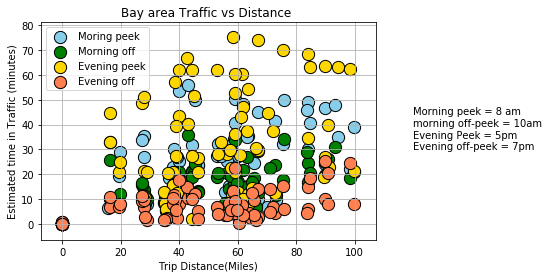

In [118]:
#plt.bar(x=morning_heavy['Trip'],height = morning_heavy['Traffic(minutes)'] )
morn_heavy_trip = morning_heavy['Traffic(minutes)']
morn_heavy_distance = morning_heavy['Distance(Miles)']
plt.scatter(y=morn_heavy_trip,x = morn_heavy_distance,c='skyblue',label='Moring peek ',s=150,edgecolor ='black',marker='o' )
plt.scatter(y=morning_light['Traffic(minutes)'],x = morning_light['Distance(Miles)'],s=150,c='green',label= 'Morning off',edgecolor ='black',marker='o')
plt.scatter(y=night_heavy['Traffic(minutes)'],x = night_heavy['Distance(Miles)'],s=150,c='gold',label='Evening peek',edgecolor ='black',marker='o' )
plt.scatter(y=night_light['Traffic(minutes)'],x = night_light['Distance(Miles)'],s=150,c='coral',label='Evening off',edgecolor ='black' ,marker='o')
plt.title("Bay area Traffic vs Distance ")
plt.xlabel("Trip Distance(Miles)")
plt.ylabel("Estimated time in Traffic (minutes)")
plt.legend(labels=["Moring peek" , "Morning off", "Evening peek", "Evening off"], loc="best")
plt.grid(True)
text2 =  """Morning peek = 8 am  
morning off-peek = 10am
Evening Peek = 5pm
Evening off-peek = 7pm"""
plt.text(120, 30,text2)
plt.savefig("Traffic_scatter1.png")
plt.show()

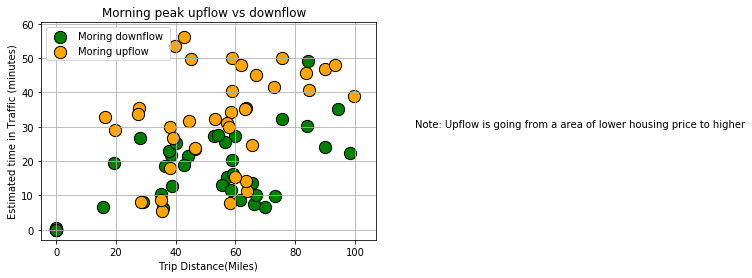

In [117]:
plt.scatter(y=mh_up['Traffic(minutes)'],x = mh_up['Distance(Miles)'],c='green',s=150,label='Moring downflow ',edgecolor ='black',marker='o' )
plt.scatter(y=mh_down['Traffic(minutes)'],x = mh_down['Distance(Miles)'],c='orange',s=150,label='Moring upflow ',edgecolor ='black',marker='o' )
plt.title("Morning peak upflow vs downflow  ")
plt.xlabel("Trip Distance(Miles)")
plt.ylabel("Estimated time in Traffic (minutes)")
plt.legend(labels=["Moring downflow " , "Moring upflow"], loc="best")
plt.grid(True)
text2 =  """Note: Upflow is going from a area of lower housing price to higher"""
plt.text(120, 30,text2)
plt.savefig("Traffic_scatter2.png")
plt.show()

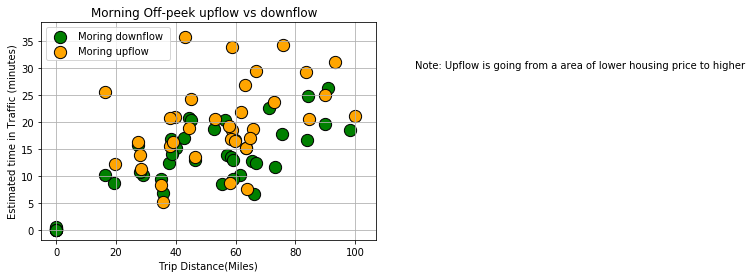

In [116]:
plt.scatter(y=ml_up['Traffic(minutes)'],x = ml_up['Distance(Miles)'],c='green',s=150,label='Moring downflow ',edgecolor ='black',marker='o' )
plt.scatter(y=ml_down['Traffic(minutes)'],x = ml_down['Distance(Miles)'],c='orange',s=150,label='Moring upflow ',edgecolor ='black',marker='o' )
plt.title("Morning Off-peek upflow vs downflow  ")
plt.xlabel("Trip Distance(Miles)")
plt.ylabel("Estimated time in Traffic (minutes)")
plt.legend(labels=["Moring downflow " , "Moring upflow"], loc="best")
text2 =  """Note: Upflow is going from a area of lower housing price to higher"""
plt.text(120, 30,text2)
plt.grid(True)
plt.savefig("Traffic_scatter3.png")
plt.show()

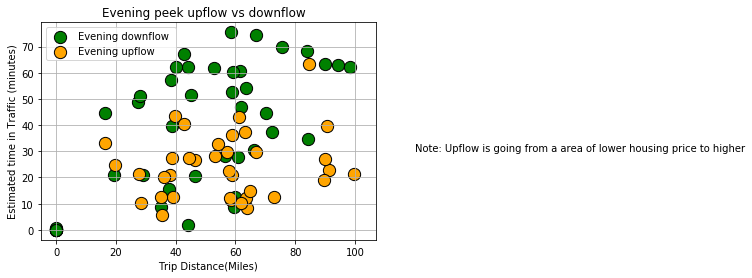

In [115]:
plt.scatter(y=nh_up['Traffic(minutes)'],x = nh_up['Distance(Miles)'],c='green',s=150,label='Evening downflow ',edgecolor ='black',marker='o' )
plt.scatter(y=nh_down['Traffic(minutes)'],x = nh_down['Distance(Miles)'],c='orange',s=150,label='Evening upflow ',edgecolor ='black',marker='o' )
plt.title("Evening peek upflow vs downflow  ")
plt.xlabel("Trip Distance(Miles)")
plt.ylabel("Estimated time in Traffic (minutes)")
plt.legend(labels=["Evening downflow " , "Evening upflow"], loc="best")
text2 =  """Note: Upflow is going from a area of lower housing price to higher"""
plt.text(120, 30,text2)
plt.grid(True)
plt.savefig("Traffic_scatter4.png")
plt.show()

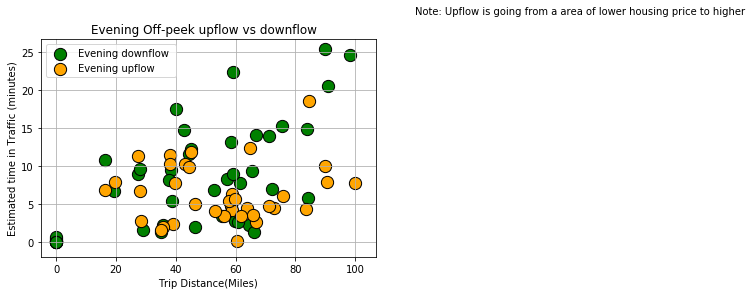

In [113]:
plt.scatter(y=nl_up['Traffic(minutes)'],x = nl_up['Distance(Miles)'],c='green',s=150,label='Evening downflow ',edgecolor ='black',marker='o' )
plt.scatter(y=nl_down['Traffic(minutes)'],x = nl_down['Distance(Miles)'],c='orange',s=150,label='Evening upflow ',edgecolor ='black',marker='o' )
plt.title("Evening Off-peek upflow vs downflow  ")
plt.xlabel("Trip Distance(Miles)")
plt.ylabel("Estimated time in Traffic (minutes)")
plt.legend(labels=["Evening downflow " , "Evening upflow"], loc="best")
text2 =  """Note: Upflow is going from a area of lower housing price to higher"""
plt.text(120, 30,text2)
plt.grid(True)
plt.show()

In [ ]:
gmaps.configure(api_key=gkey)
locations = traffic_df[['Origin Lat','Origin Lng']].astype(float)
destinations = traffic_df[['Destination Lat','Destination Lng']].astype(float)
traffic_heat = traffic_df['Traffic(minutes)'].astype(float)
#,'Destination Lat','Destination Lng'
start = (37.9,-121.9)
end = (37.6,-122.5)
start2 = (origin_lat[0],origin_long[0])
end2 = (37.354108,-121.955236)
fig = gmaps.figure(center=(37.765206,-122.241636),zoom_level=10)
fig.add_layer(gmaps.directions_layer(start,end))
fig.add_layer(gmaps.directions_layer(start2,end2))
c= 0

    #heat_layer = gmaps.heatmap_layer(locations, weights= traffic_heat, 
                                 #dissipating=False, max_intensity=100,
                                 #point_radius = 5)
#heat_layer.dissipating = False
#heat_layer.max_intensity = 200
#heat_layer.point_radius = .25
#fig.add_layer(heat_layer)

fig
